In [13]:
import pandas as pd
from importlib import reload

from src import constants as C
from src.statistics import preference_matching as PM
from src.viz import visualisations as V

reload(PV)
reload(PM)

<module 'src.statistics.preference_matching' from 'C:\\Users\\deeth\\PycharmProjects\\QA_eyetracking\\src\\statistics\\preference_matching.py'>

In [2]:
hunters = pd.read_csv("../data/hunters.csv")
gatherers = pd.read_csv("../data/gatherers.csv")

In [14]:
trial_pref_dwell = PM.compute_trial_matching(
    hunters,
    metric_col=C.MEAN_DWELL_TIME,
    direction="high",
    extreme_mode="polarity",
)
trial_pref_dwell

,TRIAL_INDEX,participant_id,selected_label,pred_label,pref_group,is_correct,A,B,C,D
0,3,l10_338,B,B,matching,0,932.000000,1186.000000,375.166667,618.600000
1,3,l10_39,D,A,not_matching,0,326.555556,93.727273,53.428571,296.333333
2,3,l11_342,A,A,matching,1,134.333333,39.666667,0.000000,0.000000
3,3,l11_40,A,A,matching,1,274.750000,41.166667,72.571429,0.000000
4,3,l14_349,A,A,matching,1,209.333333,65.750000,24.800000,26.750000
...,...,...,...,...,...,...,...,...,...,...
9714,90,l42_488,B,D,not_matching,0,101.333333,204.333333,143.500000,249.000000
9715,93,l5_175,A,D,not_matching,1,168.000000,62.600000,93.600000,357.600000
9716,94,l5_175,A,A,matching,1,493.625000,122.111111,48.166667,61.857143
9717,95,l5_175,A,A,matching,1,255.500000,226.555556,71.250000,65.166667


In [15]:
trial_pref_rel_dt = PM.compute_trial_matching(
    hunters,
    metric_col=C.MEAN_DWELL_TIME,
    extreme_mode="relative",
)
trial_pref_rel_dt

,TRIAL_INDEX,participant_id,selected_label,pred_label,pref_group,is_correct,A,B,C,D
0,3,l10_338,B,B,matching,0,932.000000,1186.000000,375.166667,618.600000
1,3,l10_39,D,C,not_matching,0,326.555556,93.727273,53.428571,296.333333
2,3,l11_342,A,A,matching,1,134.333333,39.666667,0.000000,0.000000
3,3,l11_40,A,A,matching,1,274.750000,41.166667,72.571429,0.000000
4,3,l14_349,A,A,matching,1,209.333333,65.750000,24.800000,26.750000
...,...,...,...,...,...,...,...,...,...,...
9714,90,l42_488,B,D,not_matching,0,101.333333,204.333333,143.500000,249.000000
9715,93,l5_175,A,D,not_matching,1,168.000000,62.600000,93.600000,357.600000
9716,94,l5_175,A,A,matching,1,493.625000,122.111111,48.166667,61.857143
9717,95,l5_175,A,A,matching,1,255.500000,226.555556,71.250000,65.166667


In [16]:
base_cols = [
    C.TRIAL_ID,
    C.PARTICIPANT_ID,
    "selected_label",
    "pred_label",
    "pref_group",
    "A", "B", "C", "D",
]

df_pol = trial_pref_dwell[base_cols].rename(
    columns={
        "pred_label": "pred_label_polarity",
        "pref_group": "pref_group_polarity",
    }
)

df_rel = trial_pref_rel_dt[
    [
        C.TRIAL_ID,
        C.PARTICIPANT_ID,
        "pred_label",
        "pref_group",
    ]
].rename(
    columns={
        "pred_label": "pred_label_relative",
        "pref_group": "pref_group_relative",
    }
)

cmp = df_pol.merge(
    df_rel,
    on=[C.TRIAL_ID, C.PARTICIPANT_ID],
    how="inner",
)


diff = cmp[
    cmp["pref_group_polarity"] != cmp["pref_group_relative"]
]
diff


,TRIAL_INDEX,participant_id,selected_label,pred_label_polarity,pref_group_polarity,A,B,C,D,pred_label_relative,pref_group_relative
9,3,l17_48,A,A,matching,343.666667,312.000000,309.333333,137.750000,D,not_matching
26,3,l27_377,C,B,not_matching,901.666667,926.333333,275.333333,300.000000,C,matching
33,3,l2_65,D,D,matching,241.333333,168.142857,108.000000,286.400000,C,not_matching
40,3,l32_389,A,A,matching,1002.583333,857.000000,834.777778,245.625000,D,not_matching
42,3,l33_258,A,A,matching,168.444444,142.375000,75.800000,104.000000,C,not_matching
...,...,...,...,...,...,...,...,...,...,...,...
9686,80,l52_2023,A,A,matching,109.714286,95.600000,0.000000,52.000000,C,not_matching
9687,81,l13_206,A,A,matching,201.571429,82.333333,0.000000,122.285714,C,not_matching
9688,81,l18_526,A,D,not_matching,71.000000,78.666667,82.800000,88.857143,A,matching
9693,82,l52_2023,A,A,matching,84.600000,37.333333,57.733333,79.000000,B,not_matching


In [17]:
trial_pref_skip = PM.compute_trial_matching(
    hunters,
    metric_col=C.SKIP_RATE,
    direction="low",
    extreme_mode="polarity",
)
trial_pref_skip

,TRIAL_INDEX,participant_id,selected_label,pred_label,pref_group,is_correct,A,B,C,D
0,3,l10_338,B,A,not_matching,0,0.000000,0.000000,0.166667,0.200000
1,3,l10_39,D,A,not_matching,0,0.333333,0.545455,0.714286,0.444444
2,3,l11_342,A,A,matching,1,0.000000,0.666667,1.000000,1.000000
3,3,l11_40,A,A,matching,1,0.375000,0.666667,0.571429,1.000000
4,3,l14_349,A,A,matching,1,0.333333,0.500000,0.800000,0.750000
...,...,...,...,...,...,...,...,...,...,...
9714,90,l42_488,B,D,not_matching,0,0.666667,0.333333,0.500000,0.000000
9715,93,l5_175,A,A,matching,1,0.000000,0.600000,0.500000,0.400000
9716,94,l5_175,A,A,matching,1,0.125000,0.444444,0.666667,0.571429
9717,95,l5_175,A,B,not_matching,1,0.333333,0.000000,0.500000,0.500000


In [18]:
trial_pref_rel_sr = PM.compute_trial_matching(
    hunters,
    metric_col=C.SKIP_RATE,
    extreme_mode="relative",
)
trial_pref_rel_sr

,TRIAL_INDEX,participant_id,selected_label,pred_label,pref_group,is_correct,A,B,C,D
0,3,l10_338,B,D,not_matching,0,0.000000,0.000000,0.166667,0.200000
1,3,l10_39,D,C,not_matching,0,0.333333,0.545455,0.714286,0.444444
2,3,l11_342,A,A,matching,1,0.000000,0.666667,1.000000,1.000000
3,3,l11_40,A,D,not_matching,1,0.375000,0.666667,0.571429,1.000000
4,3,l14_349,A,A,matching,1,0.333333,0.500000,0.800000,0.750000
...,...,...,...,...,...,...,...,...,...,...
9714,90,l42_488,B,D,not_matching,0,0.666667,0.333333,0.500000,0.000000
9715,93,l5_175,A,A,matching,1,0.000000,0.600000,0.500000,0.400000
9716,94,l5_175,A,A,matching,1,0.125000,0.444444,0.666667,0.571429
9717,95,l5_175,A,B,not_matching,1,0.333333,0.000000,0.500000,0.500000


,pref_group,n_trials,n_correct,acc,ci_low,ci_high
0,matching,6196,5427,0.875888,0.867444,0.883865
1,not_matching,3523,3022,0.857792,0.845868,0.868936


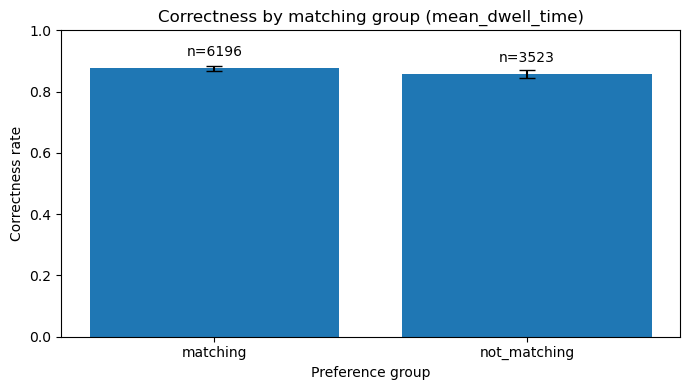

In [19]:
V.plot_correctness_by_matching(
    trial_pref_dwell,
    metric_name=C.MEAN_DWELL_TIME,
)